[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cca-cce/osm-cca/blob/main/jnb/simm71/cv2_lecture.ipynb)

# Research question

**Introduction:**  
How can advanced computer vision techniques, such as image classification, emotion recognition, and object detection, be applied to differentiate between authentic sustainability communication and inauthentic greenwashing in corporate imagery? To what extent do these visual strategies differ between organizations with inherently unsustainable operations (e.g., Preem) and those focused on renewable energy (e.g., Vattenfall)? By examining these distinctions, we aim to uncover patterns that reveal the sincerity of sustainability messaging and identify the hallmarks of greenwashing.

**Research Question:**  
How do image classification, emotion recognition, and object detection differentiate authentic sustainability communication from greenwashing, and what visual elements are more prevalent in the imagery of organizations with varying levels of environmental responsibility?

**Hypotheses:**  
1. Images from companies with inherently unsustainable operations will display higher frequencies of stereotypical sustainability symbols (e.g., lush greenery, wildlife) as identified through object detection, compared to companies focused on renewable energy.
2. Emotion recognition will reveal a higher prevalence of imagery evoking positive emotions (e.g., happiness, serenity) in greenwashing campaigns to manipulate perceptions of sustainability.
3. Image classification models will show significant differences in the thematic categories of images used, with greenwashing campaigns leaning heavily on naturalistic themes compared to authentic sustainability communication.

**Proposed Investigation:**  
This study will leverage computer vision methods to systematically analyze the visual strategies employed by companies like Preem and Vattenfall in their sustainability communication. Specifically, we will:

- **Image Classification**: Utilize pre-trained or fine-tuned classification models to categorize images into thematic groups (e.g., nature, industry, renewable energy). The relative frequencies of these themes can be compared to assess the focus of each company's communication strategy.
- **Emotion Recognition**: Apply models capable of detecting emotional cues in images, such as smiling faces or tranquil landscapes, to determine whether certain emotions are over-represented in greenwashing campaigns.
- **Object Detection**: Use object detection models to identify the presence of key visual elements such as solar panels, wind turbines, forests, or wildlife. This analysis can highlight whether companies disproportionately emphasize certain objects to project an image of sustainability.

**Measuring Authenticity Through Computer Vision:**
1. **Image Classification**: Models like Vision Transformers (ViT) or ResNet can categorize images into predefined classes (e.g., industrial settings, natural landscapes). Companies employing greenwashing are expected to overemphasize naturalistic imagery, creating a contrast with the actual focus of their operations.
2. **Emotion Recognition**: Tools such as AffectNet or Microsoft Azure’s Face API can detect emotional tones in images. Greenwashing campaigns are hypothesized to leverage positive emotional imagery to evoke trust and environmental friendliness.
3. **Object Detection**: Models like YOLOv5 or Faster R-CNN can be used to identify specific objects in the images. For example, an overrepresentation of trees, flowers, or animals in Preem’s visuals compared to Vattenfall’s may signal greenwashing tactics.

**Hypothesis Testing and Validation:**
- **Quantitative Comparisons**: Analyze the proportion of naturalistic versus industrial themes across both companies’ image sets. Use statistical tests (e.g., chi-square, t-tests) to determine significant differences.
- **Emotion Analysis**: Compare the emotional tones prevalent in each company’s imagery to test whether greenwashing campaigns rely more heavily on eliciting positive emotions.
- **Visual Authenticity Scores**: Combine findings from classification, emotion recognition, and object detection into composite scores representing the likelihood of greenwashing. These scores can be validated against expert assessments of image authenticity.

**Expected Contributions:**  
By applying computer vision techniques to differentiate between authentic sustainability communication and greenwashing, this study aims to:
- Develop a systematic approach to evaluate the sincerity of visual sustainability messaging.
- Provide insights into the visual hallmarks of greenwashing campaigns.
- Offer a replicable framework for analyzing corporate sustainability communication across industries.

The results of this investigation can enhance our understanding of how visual content is used to shape public perceptions of sustainability and support the development of tools to hold organizations accountable for misleading practices.

# Download visual content data

In [1]:
# https://drive.google.com/file/d/1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W/view?usp=sharing
!rm -rf *.zip cv-* 2>/dev/null
!gdown https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W
!unzip -q *.zip 2>/dev/null

Downloading...
From (original): https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W
From (redirected): https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W&confirm=t&uuid=6389d7ec-07c6-4188-b36a-ad9df5b889c5
To: /content/drive-download-20250106T125430Z-001.zip
100% 114M/114M [00:00<00:00, 136MB/s]


# Read and display sample image

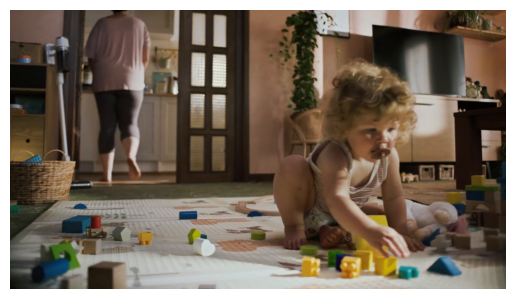

In [2]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0002.png"
image = cv2.imread(image_path)

# Convert the color scheme from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use Seaborn to improve plot aesthetics
sns.set()  # Apply Seaborn styles

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


# Extract manifest image features

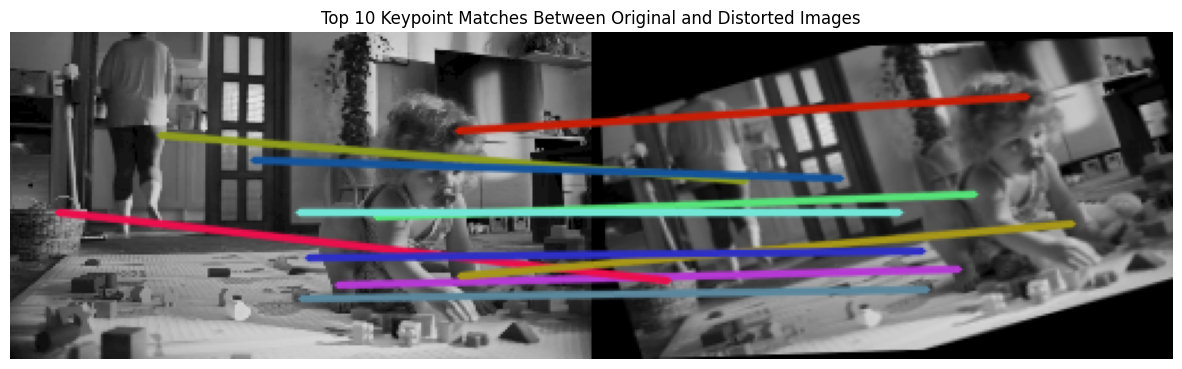

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Load and downsample the original image to width 256 pixels
original_image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0002.png"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    raise FileNotFoundError(f"Image not found at {original_image_path}")

# Downsample the image to 256 pixels width while maintaining the aspect ratio
height, width = original_image.shape
new_width = 256
new_height = int(height * (new_width / width))
original_image = cv2.resize(original_image, (new_width, new_height))

# Create a less distorted version of the image (rotate, skew, downsample slightly)
def distort_image(image):
    rows, cols = image.shape

    # Rotation (smaller angle)
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle=15, scale=1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Skew (less dramatic affine transformation)
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[55, 55], [205, 50], [60, 195]])
    affine_matrix = cv2.getAffineTransform(pts1, pts2)
    skewed_image = cv2.warpAffine(rotated_image, affine_matrix, (cols, rows))

    return skewed_image

distorted_image = distort_image(original_image)

# Detect SIFT keypoints and descriptors
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(original_image, None)
keypoints2, descriptors2 = sift.detectAndCompute(distorted_image, None)

# Match keypoints using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)  # Sort by distance (quality)

# Select the top 10 matches
top_matches = matches[:10]

# Create a combined image to visualize matches
output_height = max(original_image.shape[0], distorted_image.shape[0])
output_width = original_image.shape[1] + distorted_image.shape[1]
matched_image = np.zeros((output_height, output_width), dtype=np.uint8)

# Place the original and distorted images side by side
matched_image[:original_image.shape[0], :original_image.shape[1]] = original_image
matched_image[:distorted_image.shape[0], original_image.shape[1]:] = distorted_image

# Draw lines between the top key points
color_image = cv2.cvtColor(matched_image, cv2.COLOR_GRAY2BGR)
for match in top_matches:
    pt1 = tuple(map(int, keypoints1[match.queryIdx].pt))
    pt2 = tuple(map(int, keypoints2[match.trainIdx].pt))
    pt2 = (pt2[0] + original_image.shape[1], pt2[1])  # Adjust pt2 x-coordinate for side-by-side display

    # Generate a random color for each match
    color = [random.randint(0, 255) for _ in range(3)]

    # Draw smooth lines
    cv2.line(color_image, pt1, pt2, color, thickness=2, lineType=cv2.LINE_AA)

# Display the result
plt.figure(figsize=(15, 8))
plt.imshow(color_image[..., ::-1])  # Convert BGR to RGB for displaying in matplotlib
plt.axis("off")
plt.title("Top 10 Keypoint Matches Between Original and Distorted Images")
plt.show()


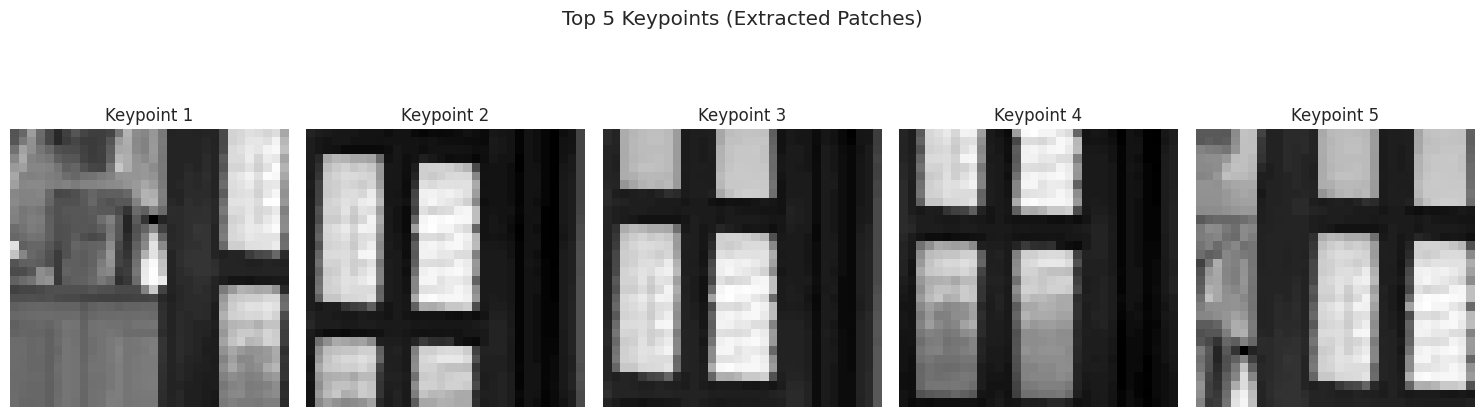

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to extract and plot individual keypoints
def extract_keypoint_patch(image, keypoint, patch_size=32):
    """
    Extract a patch around a keypoint.
    :param image: Input image (grayscale).
    :param keypoint: Keypoint object.
    :param patch_size: Size of the square patch (default: 32x32).
    :return: Cropped patch around the keypoint.
    """
    x, y = map(int, keypoint.pt)
    half_size = patch_size // 2
    return image[max(y - half_size, 0):y + half_size, max(x - half_size, 0):x + half_size]

# Load the original image
original_image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0002.png"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    raise FileNotFoundError(f"Image not found at {original_image_path}")

# Downsample the image to 256 pixels width while maintaining the aspect ratio
height, width = original_image.shape
new_width = 256
new_height = int(height * (new_width / width))
original_image = cv2.resize(original_image, (new_width, new_height))

# Detect SIFT keypoints and descriptors
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(original_image, None)

# Select the top 5 keypoints based on their response (strength)
keypoints = sorted(keypoints, key=lambda kp: kp.response, reverse=True)[:5]

# Extract patches around the top 5 keypoints
patches = [extract_keypoint_patch(original_image, kp) for kp in keypoints]

# Plot the patches as horizontal subplots
fig, axes = plt.subplots(1, len(patches), figsize=(15, 5))

for i, patch in enumerate(patches):
    axes[i].imshow(patch, cmap='gray')
    axes[i].axis("off")
    axes[i].set_title(f"Keypoint {i + 1}")

plt.suptitle("Top 5 Keypoints (Extracted Patches)")
plt.tight_layout()
plt.show()


# Extract latent image features

In [5]:
!pip install -q transformers torch pillow


# Image classification, labeling

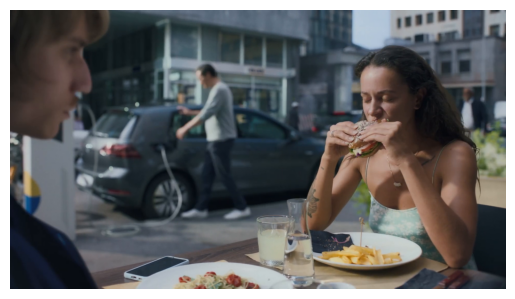

In [6]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"
image = cv2.imread(image_path)

# Convert the color scheme from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use Seaborn to improve plot aesthetics
sns.set()  # Apply Seaborn styles

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


In [7]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"

# Load the image
image = Image.open(image_path).convert("RGB")

# Load the pre-trained ViT model and feature extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted class probabilities
probs = torch.nn.functional.softmax(outputs.logits[0], dim=-1)

# Get the top 10 classes by confidence score
top_k = 10
top_probs, top_classes = torch.topk(probs, top_k)

# Load class labels
labels = model.config.id2label

# Print the top 10 classes with confidence scores
print("Top 10 Predicted Classes:")
for i in range(top_k):
    print(f"{i + 1}: {labels[top_classes[i].item()]} ({top_probs[i].item() * 100:.2f}%)")


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Top 10 Predicted Classes:
1: restaurant, eating house, eating place, eatery (54.16%)
2: plate (10.97%)
3: hotdog, hot dog, red hot (8.19%)
4: burrito (2.50%)
5: dining table, board (2.39%)
6: tray (1.09%)
7: panpipe, pandean pipe, syrinx (0.93%)
8: carbonara (0.72%)
9: cheeseburger (0.66%)
10: patio, terrace (0.65%)


In [8]:
import os
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch
import pandas as pd

# Directories to process
directories = {
    "cv-org1-preem": "/content/cv-org1-preem/",
    "cv-org2-vattenfall": "/content/cv-org2-vattenfall/"
}

# Load the pre-trained ViT model and feature extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# Initialize results list
results = []

# Iterate through directories and process images
for org_name, dir_path in directories.items():
    for file_name in os.listdir(dir_path):
        if file_name.startswith("frame_") and file_name.endswith(".png"):
            image_path = os.path.join(dir_path, file_name)

            # Load the image
            image = Image.open(image_path).convert("RGB")

            # Preprocess the image
            inputs = feature_extractor(images=image, return_tensors="pt")

            # Perform inference
            with torch.no_grad():
                outputs = model(**inputs)

            # Get predicted class probabilities
            probs = torch.nn.functional.softmax(outputs.logits[0], dim=-1)

            # Get the top 10 classes by confidence score
            top_k = 10
            top_probs, top_classes = torch.topk(probs, top_k)

            # Store results
            for i in range(top_k):
                results.append({
                    "organization": org_name,
                    "image_path": image_path,
                    "label_rank": i + 1,
                    "class_label": model.config.id2label[top_classes[i].item()],
                    "confidence_score": top_probs[i].item()
                })

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Save the DataFrame as a TSV file
output_tsv_path = "/content/image_classification_results.tsv"
df.to_csv(output_tsv_path, sep="\t", index=False)


In [9]:
df.head()

,organization,image_path,label_rank,class_label,confidence_score
0,cv-org1-preem,/content/cv-org1-preem/frame_oYgrxXZTAQg_0005.png,1,chain,0.391605
1,cv-org1-preem,/content/cv-org1-preem/frame_oYgrxXZTAQg_0005.png,2,tractor,0.103739
2,cv-org1-preem,/content/cv-org1-preem/frame_oYgrxXZTAQg_0005.png,3,"thresher, thrasher, threshing machine",0.057419
3,cv-org1-preem,/content/cv-org1-preem/frame_oYgrxXZTAQg_0005.png,4,"lumbermill, sawmill",0.053822
4,cv-org1-preem,/content/cv-org1-preem/frame_oYgrxXZTAQg_0005.png,5,"harvester, reaper",0.028655


<ipython-input-10-87753fced816>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_labels = aggregated_df.groupby('organization').apply(


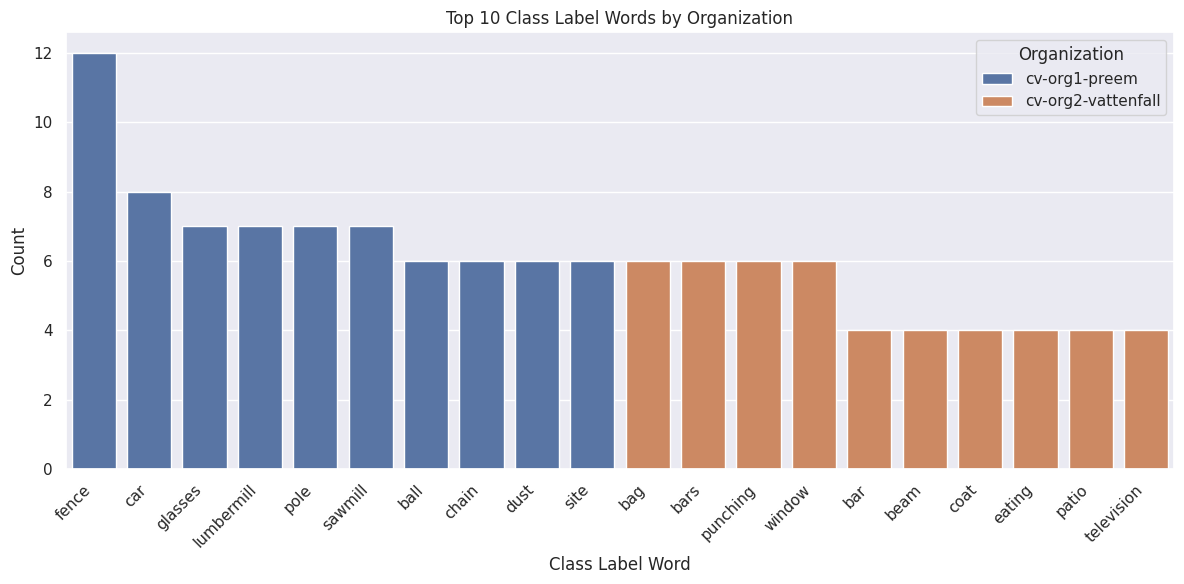

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the previously saved TSV file
input_tsv_path = "/content/image_classification_results.tsv"
df = pd.read_csv(input_tsv_path, sep="\t")

# Split the `class_label` column into individual words
expanded_rows = []
for _, row in df.iterrows():
    words = row['class_label'].replace(',', '').split()
    for word in words:
        expanded_rows.append({'organization': row['organization'], 'class_label_word': word})

# Create a new DataFrame with one label word per row
expanded_df = pd.DataFrame(expanded_rows)

# Aggregate by organization and class_label_word
aggregated_df = expanded_df.groupby(['organization', 'class_label_word']).size().reset_index(name='count')

# Filter for the top 10 labels by organization
top_labels = aggregated_df.groupby('organization').apply(
    lambda x: x.nlargest(10, 'count')
).reset_index(drop=True)

# Visualize the results using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_labels,
    x='class_label_word',
    y='count',
    hue='organization'
)
plt.title('Top 10 Class Label Words by Organization')
plt.xlabel('Class Label Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Organization')
plt.tight_layout()
plt.show()


In [11]:
df.shape

(310, 5)

# Object detection, localization

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TrueType font not found. Using default font.
Detected: cup | Confidence: 1.0 | Location: [x_min: 948, y_min: 796, x_max: 1101, y_max: 998]
Detected: person | Confidence: 0.95 | Location: [x_min: -1, y_min: 0, x_max: 385, y_max: 515]
Detected: person | Confidence: 0.99 | Location: [x_min: 1728, y_min: 301, x_max: 1873, y_max: 501]
Detected: person | Confidence: 1.0 | Location: [x_min: 625, y_min: 203, x_max: 932, y_max: 819]
Detected: sandwich | Confidence: 0.98 | Location: [x_min: 1308, y_min: 423, x_max: 1459, y_max: 569]
Detected: car | Confidence: 0.99 | Location: [x_min: 239, y_min: 365, x_max: 1214, y_max: 819]
Detected: cell phone | Confidence: 1.0 | Location: [x_min: 426, y_min: 948, x_max: 696, y_max: 1056]
Detected: tie | Confidence: 0.92 | Location: [x_min: 1756, y_min: 359, x_max: 1793, y_max: 460]
Detected: dining table | Confidence: 0.97 | Location: [x_min: 323, y_min: 820, x_max: 1914, y_max: 1069]
Detected: chair | Confidence: 0.9 | Location: [x_min: 1780, y_min: 747, x_

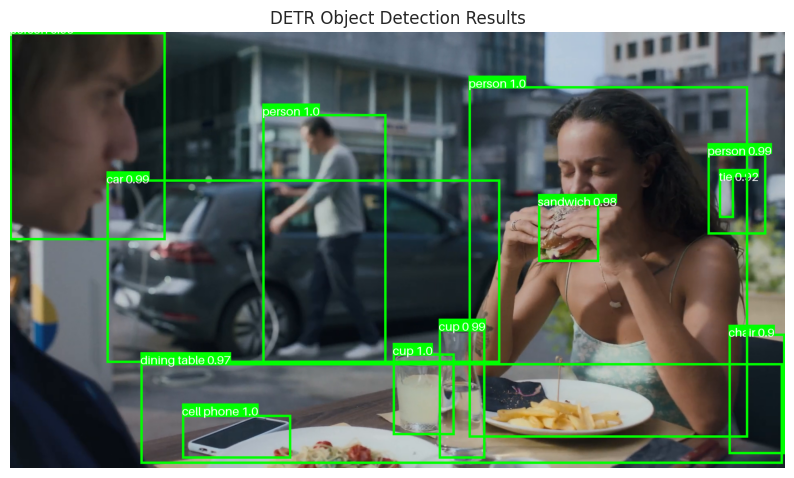

Object detection completed. Result saved to /content/detr_object_detection_result.png


In [12]:
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"
output_image_path = "/content/detr_object_detection_result.png"

# Load the image
image = Image.open(image_path).convert("RGB")

# Load the DETR model and processor
model_name = "facebook/detr-resnet-50"
processor = DetrImageProcessor.from_pretrained(model_name)
model = DetrForObjectDetection.from_pretrained(model_name)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Post-process the results
target_sizes = torch.tensor([image.size[::-1]])  # (height, width)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Prepare to draw on the image
draw = ImageDraw.Draw(image)

# Load a TrueType font or fallback to default
try:
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Update path if needed
    font = ImageFont.truetype(font_path, size=30)  # Increased font size to 30
except OSError:
    print("TrueType font not found. Using default font.")
    font = ImageFont.load_default(size=30)

# Draw bounding boxes and annotations
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    # Extract bounding box coordinates and label
    x_min, y_min, x_max, y_max = [round(i) for i in box.tolist()]
    label_text = f"{model.config.id2label[label.item()]} {round(score.item(), 2)}"

    # Print detected object details
    print(f"Detected: {model.config.id2label[label.item()]} | "
          f"Confidence: {round(score.item(), 2)} | "
          f"Location: [x_min: {x_min}, y_min: {y_min}, x_max: {x_max}, y_max: {y_max}]")

    # Draw the bounding box in green (R:0, G:255, B:0) with increased line width
    draw.rectangle([x_min, y_min, x_max, y_max], outline=(0, 255, 0), width=6)

    # Annotate with class label and confidence score
    text_bbox = draw.textbbox((x_min, y_min), label_text, font=font)  # Get the bounding box of the text
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
    draw.rectangle([x_min, y_min - text_height, x_min + text_width, y_min], fill=(0, 255, 0))
    draw.text((x_min, y_min - text_height), label_text, fill="white", font=font)

# Save the result image
image.save(output_image_path)

# Display the result image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("DETR Object Detection Results")
plt.show()

print(f"Object detection completed. Result saved to {output_image_path}")


preprocessor_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/26.0M [00:00<?, ?B/s]

TrueType font not found. Using default font.
Detected: person | Confidence: 1.0 | Location: [x_min: 1148, y_min: 135, x_max: 1843, y_max: 1029]
Detected: person | Confidence: 0.97 | Location: [x_min: 1741, y_min: 295, x_max: 1831, y_max: 487]
Detected: person | Confidence: 0.99 | Location: [x_min: 1, y_min: -2, x_max: 424, y_max: 1070]
Detected: person | Confidence: 0.99 | Location: [x_min: 619, y_min: 201, x_max: 902, y_max: 807]
Detected: dining table | Confidence: 0.95 | Location: [x_min: 334, y_min: 777, x_max: 1688, y_max: 1072]
Detected: cup | Confidence: 0.98 | Location: [x_min: 954, y_min: 784, x_max: 1098, y_max: 1015]
Detected: car | Confidence: 0.9 | Location: [x_min: 335, y_min: 358, x_max: 1266, y_max: 814]


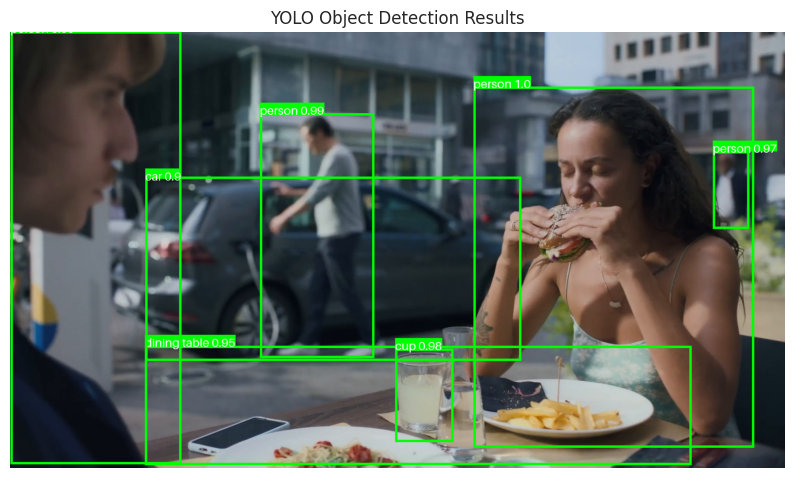

Object detection completed. Result saved to /content/yolo_object_detection_result.png


In [13]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"
output_image_path = "/content/yolo_object_detection_result.png"

# Load the image
image = Image.open(image_path).convert("RGB")

# Load the YOLO model and processor
model_name = "hustvl/yolos-tiny"
processor = YolosImageProcessor.from_pretrained(model_name)
model = YolosForObjectDetection.from_pretrained(model_name)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Post-process the results
target_sizes = torch.tensor([image.size[::-1]])  # (height, width)
results = processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# Prepare to draw on the image
draw = ImageDraw.Draw(image)

# Load a TrueType font or fallback to default
try:
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Update path if needed
    font = ImageFont.truetype(font_path, size=30)  # Further increased font size to 30
except OSError:
    print("TrueType font not found. Using default font.")
    font = ImageFont.load_default(size=30)

# Draw bounding boxes and annotations
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    # Extract bounding box coordinates and label
    x_min, y_min, x_max, y_max = [round(i) for i in box.tolist()]
    label_text = f"{model.config.id2label[label.item()]} {round(score.item(), 2)}"

    # Print detected object details
    print(f"Detected: {model.config.id2label[label.item()]} | "
          f"Confidence: {round(score.item(), 2)} | "
          f"Location: [x_min: {x_min}, y_min: {y_min}, x_max: {x_max}, y_max: {y_max}]")

    # Draw the bounding box in green (R:0, G:255, B:0) with increased line width
    draw.rectangle([x_min, y_min, x_max, y_max], outline=(0, 255, 0), width=6)

    # Annotate with class label and confidence score
    text_bbox = draw.textbbox((x_min, y_min), label_text, font=font)  # Get the bounding box of the text
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
    draw.rectangle([x_min, y_min - text_height, x_min + text_width, y_min], fill=(0, 255, 0))
    draw.text((x_min, y_min - text_height), label_text, fill="white", font=font)

# Save the result image
image.save(output_image_path)

# Display the result image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("YOLO Object Detection Results")
plt.show()

print(f"Object detection completed. Result saved to {output_image_path}")


# Face analysis, emotion recognition

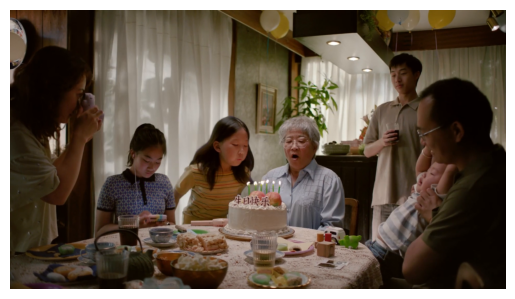

In [14]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0013.png"
image = cv2.imread(image_path)

# Convert the color scheme from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use Seaborn to improve plot aesthetics
sns.set()  # Apply Seaborn styles

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


In [15]:
import cv2
import os

# Path to the input image
image_path = "/content/cv-org1-preem/frame_oYgrxXZTAQg_0011.png"
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0013.png"

# Load the Haar cascade for face detection
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_cascade_path)

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Resize image to a manageable size (optional, based on input image resolution)
max_width = 800  # Adjust this based on your requirements
height, width = image.shape[:2]
if width > max_width:
    scale_ratio = max_width / width
    image = cv2.resize(image, (int(width * scale_ratio), int(height * scale_ratio)))

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocessing: Histogram Equalization and Gaussian Blur to enhance detection
gray_image = cv2.equalizeHist(gray_image)
gray_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Detect faces with optimized parameters
faces = face_cascade.detectMultiScale(
    gray_image,
    scaleFactor=1.05,  # More granularity for better accuracy
    minNeighbors=3,    # Lower threshold to capture more potential faces
    minSize=(30, 30)   # Adjust based on expected face sizes
)

# Draw green rectangles around detected faces and save face subimages
output_directory = os.path.dirname(image_path)
base_filename = os.path.basename(image_path).split('.')[0]
face_count = 0

for (x, y, w, h) in faces:
    # Draw a rectangle around the face
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Extract the face subimage
    face_image = image[y:y + h, x:x + w]

    # Save the face subimage as a PNG file
    face_filename = os.path.join(output_directory, f"face{face_count}_{base_filename}.png")
    cv2.imwrite(face_filename, face_image)
    face_count += 1

# Save the image with rectangles drawn
output_image_path = os.path.join(output_directory, f"{base_filename}_with_faces.png")
cv2.imwrite(output_image_path, image)

print(f"Detection completed. Found {face_count} faces.")
print(f"Annotated image saved to: {output_image_path}")
print(f"Face subimages saved with prefix 'face0_' in the same directory.")


Detection completed. Found 1 faces.
Annotated image saved to: /content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0013_with_faces.png
Face subimages saved with prefix 'face0_' in the same directory.


In [16]:
#!pip uninstall -y torch && pip install torch==2.5.1
!pip install -q facenet-pytorch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

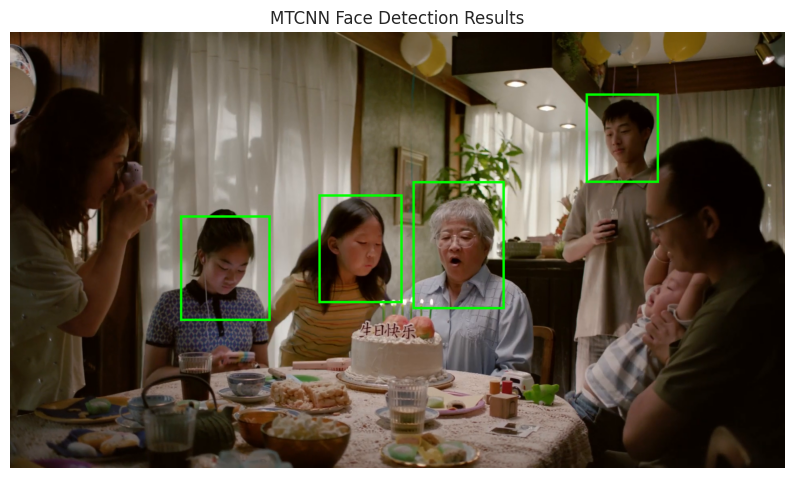

Face detection completed. 4 faces saved.
Annotated image saved to /content/mtcnn_face_detection_result.png


In [17]:
from facenet_pytorch import MTCNN
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0013.png"
output_image_path = "/content/mtcnn_face_detection_result.png"

# Load the image
image = Image.open(image_path).convert("RGB")
image_width, image_height = image.size

# Initialize the MTCNN face detector
mtcnn = MTCNN(keep_all=True)

# Detect faces and their bounding boxes
boxes, _ = mtcnn.detect(image)

# Prepare to draw on the image
draw = ImageDraw.Draw(image)

# Directory to save extracted faces
output_dir = os.path.dirname(image_path)
face_count = 0

# Draw bounding boxes and extract face subimages
if boxes is not None:
    for box in boxes:
        x_min, y_min, x_max, y_max = [int(coord) for coord in box]

        # Calculate box width and height
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Expand face box by 50% on each side
        x_min_exp = max(0, x_min - box_width // 2)
        y_min_exp = max(0, y_min - box_height // 2)
        x_max_exp = min(image_width, x_max + box_width // 2)
        y_max_exp = min(image_height, y_max + box_height // 2)

        # Draw the expanded bounding box
        draw.rectangle([x_min_exp, y_min_exp, x_max_exp, y_max_exp], outline=(0, 255, 0), width=6)

        # Extract the face subimage
        face_image = image.crop((x_min_exp, y_min_exp, x_max_exp, y_max_exp))

        # Save the face subimage
        face_filename = os.path.join(output_dir, f"face{face_count:02d}_{os.path.basename(image_path)}")
        face_image.save(face_filename)
        face_count += 1

# Save the result image with bounding boxes
image.save(output_image_path)

# Display the result image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("MTCNN Face Detection Results")
plt.show()

print(f"Face detection completed. {face_count} faces saved.")
print(f"Annotated image saved to {output_image_path}")


In [18]:
!pip install -q deepface
# restart notebook session


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00


In [2]:
from facenet_pytorch import MTCNN
from deepface import DeepFace
from PIL import Image
import os

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0013.png"
image = Image.open(image_path).convert("RGB")
image_width, image_height = image.size

# Initialize the MTCNN face detector
mtcnn = MTCNN(keep_all=True)

# Detect faces and their bounding boxes
boxes, _ = mtcnn.detect(image)

# Directory to save temporary cropped face images
output_dir = os.path.dirname(image_path)
face_count = 0

# Process detected faces
if boxes is not None:
    for box in boxes:
        x_min, y_min, x_max, y_max = [int(coord) for coord in box]

        # Calculate box width and height
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Expand face box by 50% on each side
        x_min_exp = max(0, x_min - box_width // 2)
        y_min_exp = max(0, y_min - box_height // 2)
        x_max_exp = min(image_width, x_max + box_width // 2)
        y_max_exp = min(image_height, y_max + box_height // 2)

        # Crop the expanded face region
        face_image = image.crop((x_min_exp, y_min_exp, x_max_exp, y_max_exp))

        # Save the face image temporarily
        temp_face_path = os.path.join(output_dir, f"temp_face_{face_count}.jpg")
        face_image.save(temp_face_path)

        # Analyze the face using DeepFace
        try:
            analysis = DeepFace.analyze(temp_face_path, actions=['age', 'gender', 'race', 'emotion'], enforce_detection=False)

            # Extract the first result if analysis returns a list
            if isinstance(analysis, list):
                analysis = analysis[0]

            # Print results
            print(f"Face {face_count}:")
            print(f"  Age: {analysis.get('age', 'N/A')}")
            print(f"  Gender: {analysis.get('gender', 'N/A')}")
            print(f"  Dominant Race: {analysis.get('dominant_race', 'N/A')}")
            print(f"  Emotion: {analysis.get('dominant_emotion', 'N/A')}")
            print("-" * 50)
        except Exception as e:
            print(f"Error analyzing face {face_count}: {e}")

        face_count += 1

else:
    print("No faces detected.")

print(f"Processed {face_count} faces.")


Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


Face 0:
  Age: 55
  Gender: {'Woman': 9.020434319972992, 'Man': 90.97956418991089}
  Dominant Race: asian
  Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]


Face 1:
  Age: 43
  Gender: {'Woman': 29.03997302055359, 'Man': 70.96002697944641}
  Dominant Race: asian
  Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]


Face 2:
  Age: 28
  Gender: {'Woman': 15.442650020122528, 'Man': 84.55734848976135}
  Dominant Race: white
  Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

Face 3:
  Age: 29
  Gender: {'Woman': 13.354592025279999, 'Man': 86.64540648460388}
  Dominant Race: asian
  Emotion: sad
--------------------------------------------------
Processed 4 faces.
